In [330]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import inf

In [331]:
# Parameters
beta = 5.5
sdim = 64

In [332]:
# Set Seed
np.random.seed(117);
# Turn of div by zero warning
np.seterr(divide='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [333]:
# Build power spectrum
sdim = sdim + 1
f = np.around([x/sdim for x in range(0, int(sdim/2)+1)] + [x/sdim for x in range(-int(sdim/2), 0)], 4)
u = np.reshape(f, (sdim, 1))
v = np.reshape(f, (1, sdim))
w = np.reshape(f, (sdim, 1, 1))
powerspectrum = (w**2 + u**2 + v**2)**(-beta/2)
powerspectrum[powerspectrum == inf] = powerspectrum[0,1,0]

In [334]:
powerspectrum = powerspectrum*.001

In [335]:
# Noise and ifft
phases = np.random.normal(0, 1, size=[sdim, sdim, sdim]);
complexpattern = np.fft.ifftn(powerspectrum**0.5 * (np.cos(2*np.pi*phases)+1j*np.sin(2*np.pi*phases)))

In [336]:
# Normalize result
realpattern = np.real(complexpattern)
realpattern = (realpattern-np.amin(realpattern))/np.amax(realpattern-np.amin(realpattern))

In [337]:
# Create vectors for 3d plot
z, x, y = realpattern.nonzero()
color = realpattern.flatten()
color = color[:-1]

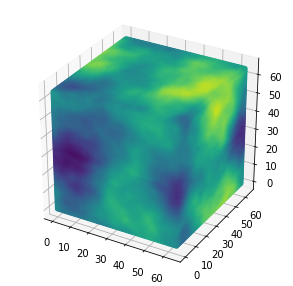

In [338]:
#3 Display 3d Fractal
fig = plt.figure()
plt.rcParams["figure.figsize"]=5,5
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=color, alpha=1)
plt.show()

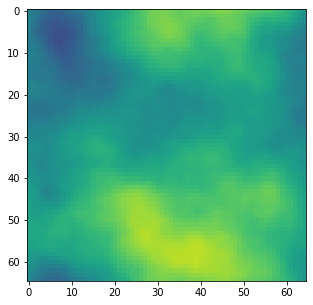

In [339]:
# Display Top slice
plt.imshow(realpattern[-1,:,:], vmin=0, vmax=1, aspect='auto')